In [28]:
import panel as pn
pn.extension('plotly')
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [29]:
import seaborn as sns

In [30]:
file_path = Path("Data/AnnualTicketSales.csv")
annual_ticket_sales_tycopy = pd.read_csv(file_path, index_col="YEAR")
annual_ticket_sales_tycopy.head()

,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
YEAR,,,,
2021,"42,37,74,881",3881777912,3881777912,9.16
2020,"22,36,38,958",2048534616,2048534616,9.16
2019,"1,22,85,41,629",11253443955,11253444050,9.16
2018,"1,31,15,36,128",11948096650,12013670952,9.11
2017,"1,22,56,39,761",10993991460,11226860216,8.97


In [31]:
annual_ticket_sales_tycopy['TICKETS SOLD'] = annual_ticket_sales_tycopy['TICKETS SOLD'].str.replace(',','')

In [32]:
annual_ticket_sales_tycopy['TICKETS SOLD'] = annual_ticket_sales_tycopy['TICKETS SOLD'].astype(int)
annual_ticket_sales_tycopy.dtypes

TICKETS SOLD                             int64
TOTAL BOX OFFICE                         int64
TOTAL INFLATION ADJUSTED BOX OFFICE      int64
AVERAGE TICKET PRICE                   float64
dtype: object

In [33]:
annual_ticket_sales_tycopy.head()

,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
YEAR,,,,
2021,423774881,3881777912,3881777912,9.16
2020,223638958,2048534616,2048534616,9.16
2019,1228541629,11253443955,11253444050,9.16
2018,1311536128,11948096650,12013670952,9.11
2017,1225639761,10993991460,11226860216,8.97


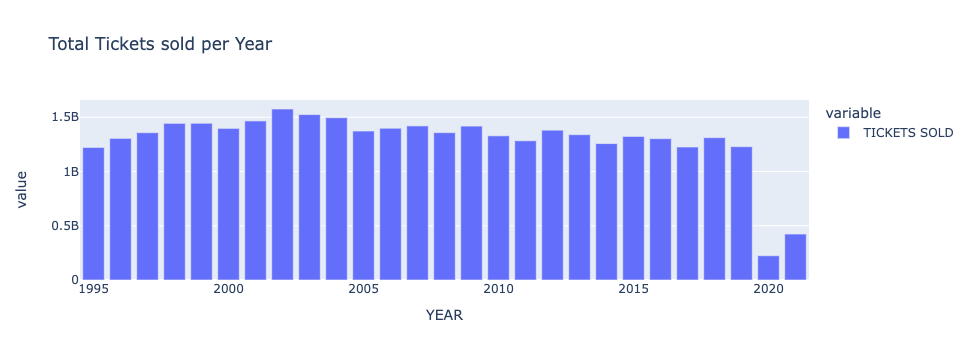

In [34]:
#this is good baseline since ticket sales have an obvious correlation to total box office
px.bar(annual_ticket_sales_tycopy, x = annual_ticket_sales_tycopy.index ,
        y = ['TICKETS SOLD'], title = 'Total Tickets sold per Year'
)

'Total inflation ajdusted box office' column could be ignored in analysis since avg ticket price wasnt adjusted for inflation. Main focus is the Total box office when looking at box office numbers. Total Box Office is on same inflation rate as the avg ticket price


In [35]:
annual_ticket_sales_tycopy.corr()
#average ticket price has a negative correaltion on tickets sold
#as ticket prices get higher, less ticekts are sold, whcih will be show below in scatter
#as ticket prices get higher, total box office goes up
#so studios would rather have less consumers but have increased prices because the higher ticket price results in more money


,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
TICKETS SOLD,1.000000,0.615514,1.000000,-0.484782
TOTAL BOX OFFICE,0.615514,1.000000,0.615515,0.385430
TOTAL INFLATION ADJUSTED BOX OFFICE,1.000000,0.615515,1.000000,-0.484781
AVERAGE TICKET PRICE,-0.484782,0.385430,-0.484781,1.000000


<AxesSubplot:>

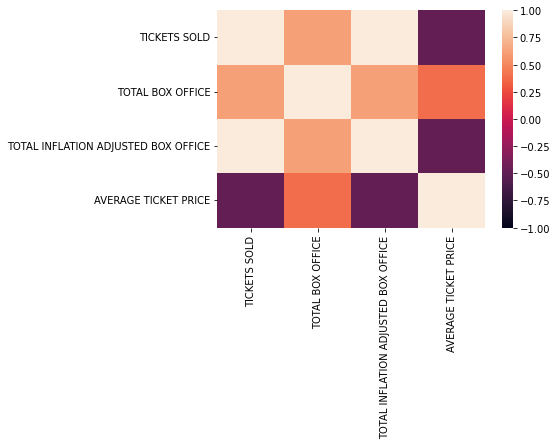

In [42]:
#visualize correlations
sns.heatmap(annual_ticket_sales_tycopy.corr(), vmin = -1, vmax = 1)

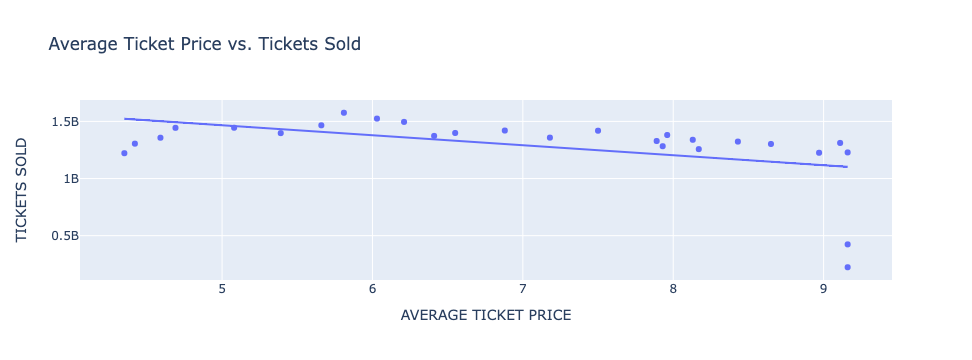

In [37]:
ticket_relationship = px.scatter(
  annual_ticket_sales_tycopy, x= 'AVERAGE TICKET PRICE', y='TICKETS SOLD', trendline = 'ols',
    title = 'Average Ticket Price vs. Tickets Sold'
)
ticket_relationship.show()

Maybe covid is an outlier, but realistically theres no reason to consider it an outlier since it's our reality, I'm sure over time tickets sold will get higher. Thinking logically, I doubt the amount of tickets sold will ever be as high as it was anytime soon, and ticket prices getting higher as well many families would probably rather just stay home and rent a movie or utilize a streaming service. By looking at stock prices for each of these studios during the pandemmic, you can see how these studios have thrived, but movie theaters have not. I'm very certain of this hypothesis.

In [38]:
#looks at years with no covid
no_covid = annual_ticket_sales_tycopy.iloc[2:]
no_covid.head()

,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
YEAR,,,,
2019,1228541629,11253443955,11253444050,9.16
2018,1311536128,11948096650,12013670952,9.11
2017,1225639761,10993991460,11226860216,8.97
2016,1302556378,11267115924,11931416424,8.65
2015,1323356776,11155900636,12121948075,8.43


In [39]:
no_covid.corr()
#as you can see still a negative correlation with avg ticket prices
#and actually shows there was a negative correlation between avg ticket price and almost a 1-1 correation for 
#box office numbers. More ticekts sold obviously means more box office.
#Still, it seeems studios/movie theaters would rather have a higher ticekt price to make more money rather
#than have a cheap ticket price with more customers. 

,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
TICKETS SOLD,1.000000,-0.178692,1.000000,-0.445028
TOTAL BOX OFFICE,-0.178692,1.000000,-0.178688,0.959115
TOTAL INFLATION ADJUSTED BOX OFFICE,1.000000,-0.178688,1.000000,-0.445024
AVERAGE TICKET PRICE,-0.445028,0.959115,-0.445024,1.000000


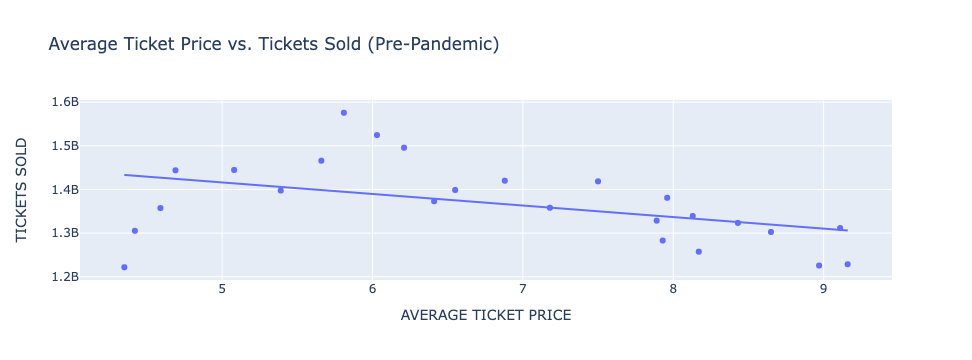

In [40]:
ticket_relationship_nocovid = px.scatter(
  no_covid, x= 'AVERAGE TICKET PRICE', y='TICKETS SOLD', trendline = 'ols', title = 'Average Ticket Price vs. Tickets Sold (Pre-Pandemic)'
)
ticket_relationship_nocovid.show()